In [2]:
import sys
import os

# Aggiungiamo la root directory del progetto al path in modo che il notebook veda la cartella 'src'
if '.' not in sys.path:
    sys.path.append('.')
if '..' not in sys.path:
    sys.path.append('..')

# Importiamo le architetture che hai salvato nel file src/models/architectures.py
from src.models.architectures import MLPBaseline, get_mobilenet, get_resnet18

print("⏳ Caricamento delle architetture in corso...")

# 1. La nostra baseline (Multi-Layer Perceptron) configurata per 4 classi
mlp_model = MLPBaseline(num_classes=4)

# 2. Il modello leggero (MobileNetV2) con Transfer Learning per 4 classi
mobilenet_model = get_mobilenet(num_classes=4)

# 3. Il modello profondo (ResNet-18) con Transfer Learning per 4 classi
resnet_model = get_resnet18(num_classes=4)

print("✅ Modelli importati e istanziati con successo! Pronti per l'addestramento.")

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 222MB/s]


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 196MB/s]


✅ Architetture (MLP, MobileNet, ResNet) caricate e configurate per 4 classi!
⏳ Caricamento delle architetture in corso...
✅ Modelli importati e istanziati con successo! Pronti per l'addestramento.


📦 Creazione dei generatori di dati (DataLoaders)...
✅ Dataloaders creati con successo!
 - Batch per Addestramento: 1062
 - Batch per Validazione: 100
 - Batch per Test: 100

🚀 Avvio addestramento di MobileNetV2...
Epoch 1/5
----------
Train Loss: 0.6533 Acc: 0.7111
Val Loss: 0.5616 Acc: 0.7456

Epoch 2/5
----------
Train Loss: 0.4147 Acc: 0.8262
Val Loss: 0.3746 Acc: 0.8447

Epoch 3/5
----------
Train Loss: 0.3041 Acc: 0.8788
Val Loss: 0.4255 Acc: 0.8297

Epoch 4/5
----------
Train Loss: 0.2336 Acc: 0.9073
Val Loss: 0.2402 Acc: 0.9012

Epoch 5/5
----------
Train Loss: 0.1831 Acc: 0.9300
Val Loss: 0.3523 Acc: 0.8675

Migliore Accuratezza in Validazione: 0.901250

📊 Valutazione del modello sul Test Set...

--- Report di Classificazione sul Test Set ---
                  precision    recall  f1-score   support

     NonDemented       0.89      0.97      0.93      1605
VeryMildDemented       0.97      0.78      0.87      1120
    MildDemented       0.83      1.00      0.91       450
Modera

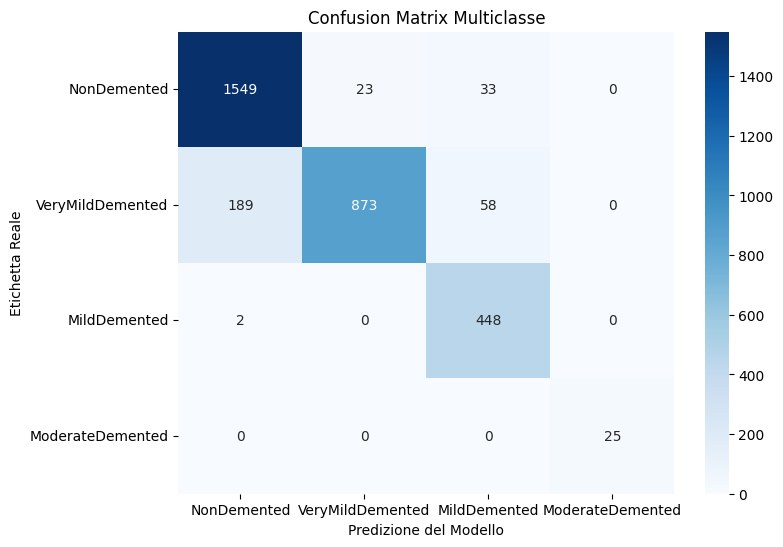


📈 Generazione della Curva ROC...


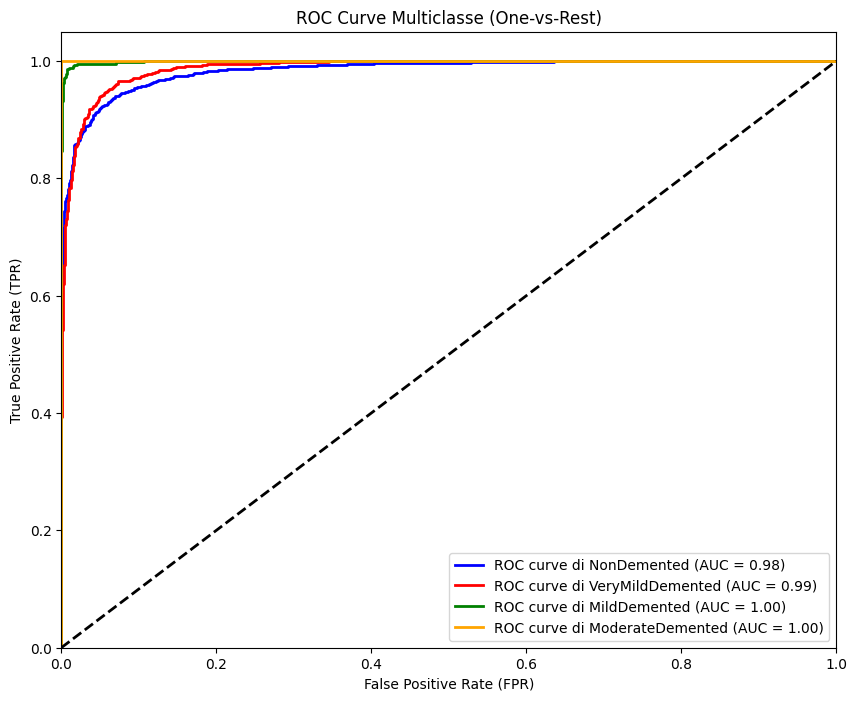


💾 Pesi del modello salvati con successo in: results/mobilenet_alzheimer.pth


In [4]:
import torch
import os

# --- IMPORTAZIONI DAI TUOI SCRIPT ---
from src.data.multi_dataloaders import get_dataloaders
from src.data.multi_preprocessing import CLASSES
from src.training.train import train_model
from src.evaluation.metrics import evaluate_model, plot_roc_curve_multiclass

# --- 1. CARICAMENTO DATI ---
print("📦 Creazione dei generatori di dati (DataLoaders)...")
TRAIN_DIR = "data/raw/AugmentedAlzheimerDataset"
ORIGINAL_DIR = "data/raw/OriginalDataset"

# Questa è la riga magica che mancava e che genera i tuoi 3 loader!
train_loader, val_loader, test_loader = get_dataloaders(TRAIN_DIR, ORIGINAL_DIR, batch_size=32)

# --- 2. ADDESTRAMENTO ---
print("\n🚀 Avvio addestramento di MobileNetV2...")
trained_mobilenet = train_model(
    model=mobilenet_model,       # Il modello istanziato nel Blocco 2
    train_loader=train_loader,   # Generato un attimo fa!
    val_loader=val_loader,       # Generato un attimo fa!
    epochs=5,                    # Facciamo 5 epoche per testare
    learning_rate=0.001
)

# --- 3. VALUTAZIONE ---
print("\n📊 Valutazione del modello sul Test Set...")
evaluate_model(trained_mobilenet, test_loader, CLASSES)

# --- 4. CURVA ROC ---
print("\n📈 Generazione della Curva ROC...")
plot_roc_curve_multiclass(trained_mobilenet, test_loader, CLASSES)

# --- 5. SALVATAGGIO ---
os.makedirs("results", exist_ok=True)
salvataggio_path = "results/mobilenet_alzheimer.pth"
torch.save(trained_mobilenet.state_dict(), salvataggio_path)
print(f"\n💾 Pesi del modello salvati con successo in: {salvataggio_path}")